### Import Dataset

In [144]:
import matplotlib.pyplot as plt
from sklearn.datasets import load_breast_cancer

data = load_breast_cancer()
print(data.data.shape, data.target.shape)

(569, 30) (569,)


### Pre-Process Date (Standardize)

In [145]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

scalar = StandardScaler()
X = scalar.fit_transform(data.data)
y = data.target
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

print(X[0],y[0])
print( x_train.shape, x_test.shape)

[ 1.09706398 -2.07333501  1.26993369  0.9843749   1.56846633  3.28351467
  2.65287398  2.53247522  2.21751501  2.25574689  2.48973393 -0.56526506
  2.83303087  2.48757756 -0.21400165  1.31686157  0.72402616  0.66081994
  1.14875667  0.90708308  1.88668963 -1.35929347  2.30360062  2.00123749
  1.30768627  2.61666502  2.10952635  2.29607613  2.75062224  1.93701461] 0
(455, 30) (114, 30)


### PCA (Reduce Data Dimensions)
with this model you can reduce dimension of your inputs to make models faster & reduce overFitting

In [146]:
from sklearn.decomposition import PCA

pca = PCA(n_components=3) # Reduce dimensions to 3
pca.fit(x_train)
x_new_train = pca.transform(x_train)
x_new_test = pca.transform(x_test)
print(x_train.shape, x_new_train.shape)

(455, 30) (455, 3)


### Evaluate Model Function

In [1]:
from sklearn.metrics import confusion_matrix, accuracy_score, recall_score, precision_score

def calculate_model_metrics(model):
    y_train_pred = model.predict(x_train)
    y_test_pred = model.predict(x_test)

    confusion_matrix_train = confusion_matrix(y_train, y_train_pred)
    accuracy_train = accuracy_score(y_train, y_train_pred)
    accuracy_test = accuracy_score(y_test, y_test_pred)
    precision_train = precision_score(y_train, y_train_pred)
    precision_test = precision_score(y_test, y_test_pred)
    recall_train = recall_score(y_train, y_train_pred)
    recall_test = recall_score(y_test, y_test_pred)

    print("confusion_matrix_train :", confusion_matrix_train)
    print("accuracy_train  :", accuracy_train)
    print("accuracy_test   :", accuracy_test)
    print("precision_test  :", precision_test)
    print("recall_test     :", recall_test)

    return accuracy_train, accuracy_test, precision_train , precision_test , recall_train , recall_test

### Naive Bayes Model

In [148]:
from sklearn.naive_bayes import GaussianNB

model = GaussianNB()
model.fit(x_train, y_train)
nb_acc_train, nb_acc_test, nb_p_train , nb_p_test , nb_r_train , nb_r_test = calculate_model_metrics(model)

confusion_matrix_train : [[144  17]
 [ 10 284]]
accuracy_train  : 0.9406593406593406
accuracy_test   : 0.956140350877193
precision_test  : 0.9393939393939394
recall_test     : 0.9841269841269841


### KNN Model

In [149]:
from sklearn.neighbors import KNeighborsClassifier

model = KNeighborsClassifier(n_neighbors=4)
model.fit(x_train, y_train)
knn_acc_train, knn_acc_test, knn_p_train , knn_p_test , knn_r_train , knn_r_test = calculate_model_metrics(model)

confusion_matrix_train : [[157   4]
 [  2 292]]
accuracy_train  : 0.9868131868131869
accuracy_test   : 0.9649122807017544
precision_test  : 0.9538461538461539
recall_test     : 0.9841269841269841


### Decision Tree Model

In [150]:
from sklearn.tree import DecisionTreeClassifier

model = DecisionTreeClassifier(max_depth=8, min_samples_split=4, min_samples_leaf=2)
model.fit(x_train, y_train)
dt_acc_train, dt_acc_test, dt_p_train , dt_p_test , dt_r_train , dt_r_test = calculate_model_metrics(model)

confusion_matrix_train : [[160   1]
 [  4 290]]
accuracy_train  : 0.989010989010989
accuracy_test   : 0.9298245614035088
precision_test  : 0.9104477611940298
recall_test     : 0.9682539682539683


### Random Forest Model

In [151]:
from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier(n_estimators=30)
model.fit(x_train, y_train)
rf_acc_train, rf_acc_test, rf_p_train , rf_p_test , rf_r_train , rf_r_test = calculate_model_metrics(model)

confusion_matrix_train : [[161   0]
 [  0 294]]
accuracy_train  : 1.0
accuracy_test   : 0.956140350877193
precision_test  : 0.953125
recall_test     : 0.9682539682539683


### SVM Model

In [152]:
from sklearn import svm

svm.SVC(kernel="poly")
model.fit(x_train, y_train)
svm_acc_train, svm_acc_test, svm_p_train , svm_p_test , svm_r_train , svm_r_test = calculate_model_metrics(model)

confusion_matrix_train : [[161   0]
 [  0 294]]
accuracy_train  : 1.0
accuracy_test   : 0.956140350877193
precision_test  : 0.953125
recall_test     : 0.9682539682539683


### Logistic Regression Model

In [153]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression()
model.fit(x_train,y_train)
lr_acc_train, lr_acc_test, lr_p_train , lr_p_test , lr_r_train , lr_r_test = calculate_model_metrics(model)

confusion_matrix_train : [[157   4]
 [  0 294]]
accuracy_train  : 0.9912087912087912
accuracy_test   : 0.9649122807017544
precision_test  : 0.9402985074626866
recall_test     : 1.0


### ANN (Artificial Neural Network)

In [154]:
from sklearn.neural_network import MLPClassifier

model = MLPClassifier(hidden_layer_sizes=[40], max_iter=180, activation="relu", solver="adam", batch_size=64)
model.fit(x_train,y_train)
ann_acc_train, ann_acc_test, ann_p_train, ann_p_test, ann_r_train, ann_r_test = calculate_model_metrics(model)

confusion_matrix_train : [[159   2]
 [  0 294]]
accuracy_train  : 0.9956043956043956
accuracy_test   : 0.9298245614035088
precision_test  : 0.9104477611940298
recall_test     : 0.9682539682539683


/home/samans76/.local/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (180) reached and the optimization hasn't converged yet.
  warnings.warn(


### Comparison

Text(0, 0.5, 'Accuracy')

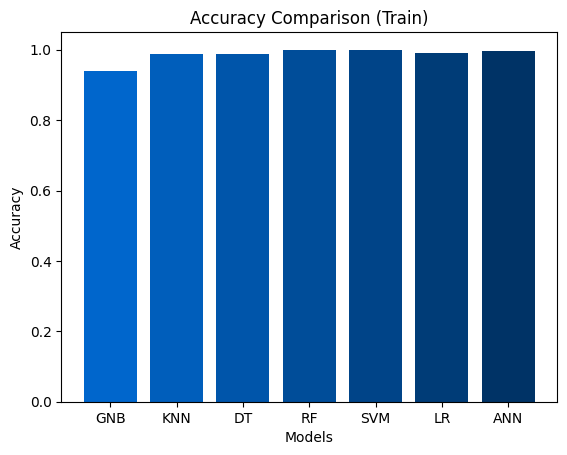

In [155]:
titles = ["GNB", "KNN", "DT", "RF", "SVM", "LR", "ANN"]
colors = [ "#0066CC", "#005EBB", "#0055AA", "#004D99", "#004488", "#003C77", "#003366"]

acc_train = [nb_acc_train, knn_acc_train, dt_acc_train, rf_acc_train, svm_acc_train, lr_acc_train, ann_acc_train]
plt.bar(titles, acc_train, color=colors)
plt.title('Accuracy Comparison (Train)')
plt.xlabel('Models')
plt.ylabel('Accuracy')

Text(0, 0.5, 'Accuracy')

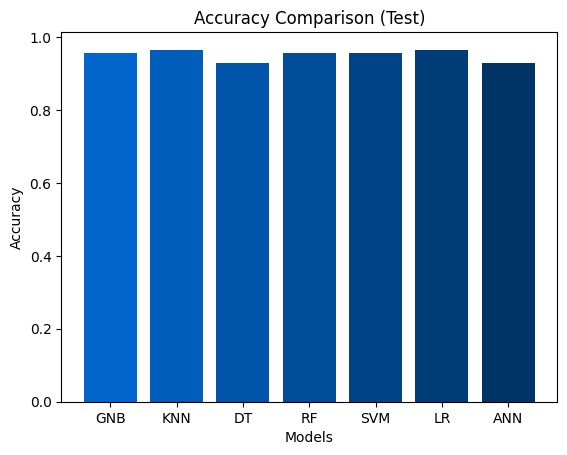

In [156]:
acc_test = [nb_acc_test, knn_acc_test, dt_acc_test, rf_acc_test, svm_acc_test, lr_acc_test, ann_acc_test]
plt.bar(titles, acc_test, color=colors)
plt.title('Accuracy Comparison (Test)')
plt.xlabel('Models')
plt.ylabel('Accuracy')

Text(0, 0.5, 'Precision')

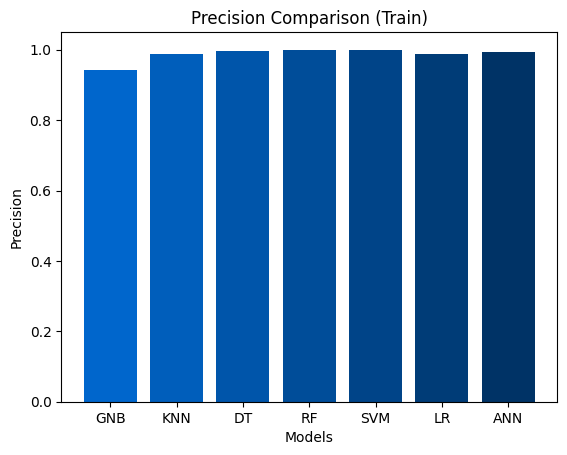

In [157]:
p_train = [nb_p_train, knn_p_train, dt_p_train, rf_p_train, svm_p_train, lr_p_train, ann_p_train]
plt.bar(titles, p_train, color=colors)
plt.title('Precision Comparison (Train)')
plt.xlabel('Models')
plt.ylabel('Precision')

Text(0, 0.5, 'Precision')

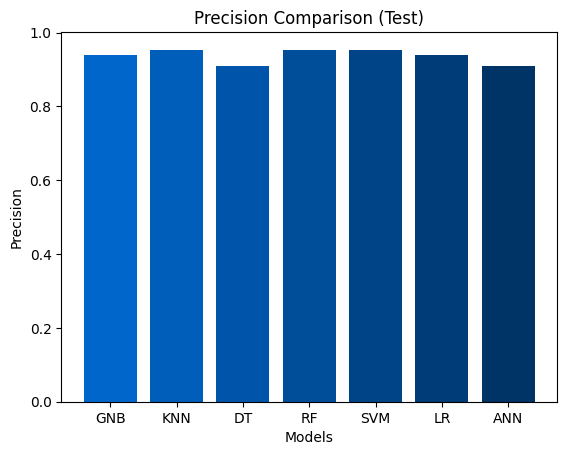

In [158]:
p_test = [nb_p_test, knn_p_test, dt_p_test, rf_p_test, svm_p_test, lr_p_test, ann_p_test]
plt.bar(titles, p_test, color=colors)
plt.title('Precision Comparison (Test)')
plt.xlabel('Models')
plt.ylabel('Precision')


Text(0, 0.5, 'Recall')

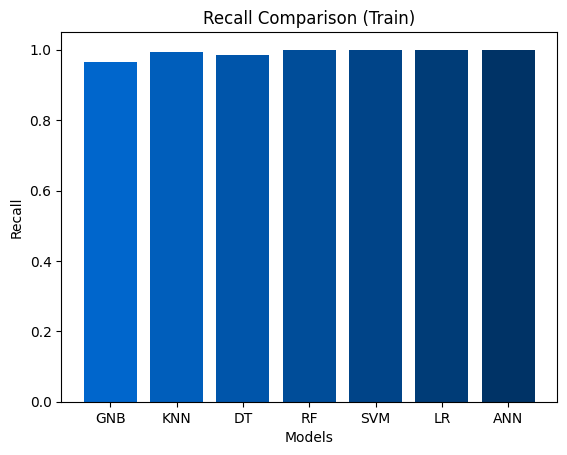

In [159]:
r_train = [nb_r_train, knn_r_train, dt_r_train, rf_r_train, svm_r_train, lr_r_train, ann_r_train]
plt.bar(titles, r_train, color=colors)
plt.title('Recall Comparison (Train)')
plt.xlabel('Models')
plt.ylabel('Recall')


Text(0, 0.5, 'Recall')

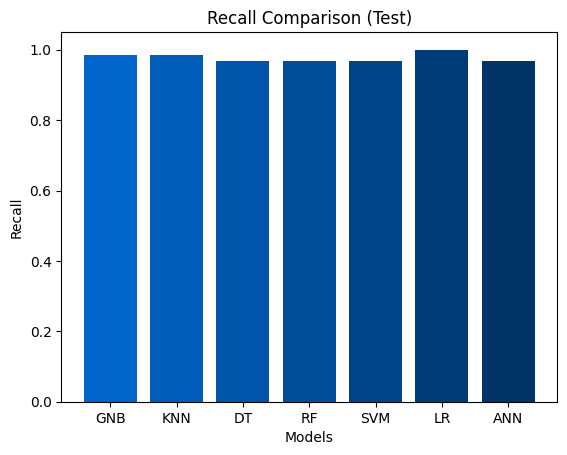

In [160]:
r_test = [nb_r_test, knn_r_test, dt_r_test, rf_r_test, svm_r_test, lr_r_test, ann_r_test]
plt.bar(titles, r_test, color=colors)
plt.title('Recall Comparison (Test)')
plt.xlabel('Models')
plt.ylabel('Recall')